## Preprocessing

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import tensorflow as tf
#  Import and read the charity_data.csv.
import pandas as pd 
from matplotlib import pyplot as plt
import sklearn as skl
from keras.callbacks import ModelCheckpoint

application_df = pd.read_csv("sample_data/charity_data.csv")
application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   EIN                     34299 non-null  int64 
 1   NAME                    34299 non-null  object
 2   APPLICATION_TYPE        34299 non-null  object
 3   AFFILIATION             34299 non-null  object
 4   CLASSIFICATION          34299 non-null  object
 5   USE_CASE                34299 non-null  object
 6   ORGANIZATION            34299 non-null  object
 7   STATUS                  34299 non-null  int64 
 8   INCOME_AMT              34299 non-null  object
 9   SPECIAL_CONSIDERATIONS  34299 non-null  object
 10  ASK_AMT                 34299 non-null  int64 
 11  IS_SUCCESSFUL           34299 non-null  int64 
dtypes: int64(4), object(8)
memory usage: 3.1+ MB


In [2]:
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
drop_columns = ["EIN","NAME"]
df = application_df.drop(columns=drop_columns)
df

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...,...
34294,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0
34295,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34296,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0
34297,T5,Independent,C3000,ProductDev,Association,1,0,N,5000,1


In [4]:
# Determine the number of unique values in each column.
df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [5]:
# Look at APPLICATION_TYPE value counts for binning
df["APPLICATION_TYPE"].value_counts(dropna = False)

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [6]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace = df['APPLICATION_TYPE'].value_counts().index[8:]
# Replace in dataframe
for app in application_types_to_replace:
   df['APPLICATION_TYPE'] = df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [7]:
# Look at CLASSIFICATION value counts for binning
df["CLASSIFICATION"].value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [8]:
# You may find it helpful to look at CLASSIFICATION value counts >1
df["CLASSIFICATION"].value_counts()[df["CLASSIFICATION"].value_counts()> 1]

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: CLASSIFICATION, dtype: int64

In [9]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace = df["CLASSIFICATION"].value_counts().index[5:]

# Replace in dataframe
for cls in classifications_to_replace:
    df['CLASSIFICATION'] = df['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [10]:
# Convert categorical data to numeric with `pd.get_dummies`
df_num = pd.get_dummies(df)
df_num.sort_values("ASK_AMT",ascending = False)

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
33175,1,8597806340,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
34222,1,8556638692,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
33678,1,5591584994,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
24795,1,4653011914,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
31337,1,3391919220,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13293,1,5000,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
13292,1,5000,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
13291,1,5000,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
13290,1,5000,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


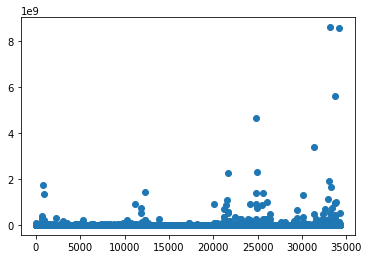

In [11]:
plt.scatter(df_num.index, df_num["ASK_AMT"])
#Identify outliers

In [12]:
df_num = df_num[df_num["ASK_AMT"] < 1000000000]
#eliminating outliers above 1e9


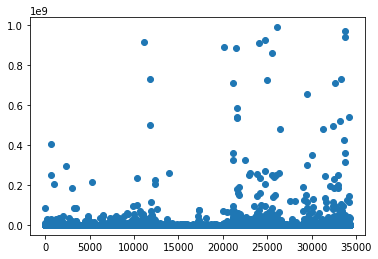

In [13]:
plt.scatter(df_num.index, df_num["ASK_AMT"])

In [14]:
# Split our preprocessed data into our features and target arrays
y = df_num.IS_SUCCESSFUL.values
X = df_num.drop(columns = "IS_SUCCESSFUL").values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [15]:
# Create a StandardScaler instances
scaler = skl.preprocessing.StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [16]:
len(X_train[0])

43

## Compile, Train and Evaluate the Model

In [17]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 50
hidden_nodes_layer2 = 50
hidden_nodes_layer3 = 50
hidden_nodes_layer4 = 50
hidden_nodes_layer5 = 50
hidden_nodes_layer6 = 50
hidden_nodes_layer7 = 50
hidden_nodes_layer8 = 50

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, activation="relu", input_dim = number_input_features))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Fourth hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer4, activation="relu"))

# Fifth hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer5, activation="relu"))

# Sixth hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer6, activation="relu"))

# Seveth hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer7, activation="relu"))

# Eight hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer8, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                2200      
                                                                 
 dense_1 (Dense)             (None, 50)                2550      
                                                                 
 dense_2 (Dense)             (None, 50)                2550      
                                                                 
 dense_3 (Dense)             (None, 50)                2550      
                                                                 
 dense_4 (Dense)             (None, 50)                2550      
                                                                 
 dense_5 (Dense)             (None, 50)                2550      
                                                                 
 dense_6 (Dense)             (None, 50)                2

In [18]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [19]:
EPOCHS = 100
checkpoint_filepath = "sample_data"
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    save_freq = 5,
    mode='auto')
#saving model weights every 5 epochs

In [20]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=EPOCHS, callbacks=[model_checkpoint_callback])
#nn.load_weights(checkpoint_filepath)

Epoch 1/100
804/804 [==============================] - 19s 21ms/step - loss: 0.5711 - accuracy: 0.7202
Epoch 2/100
804/804 [==============================] - 10s 12ms/step - loss: 0.5544 - accuracy: 0.7309
Epoch 3/100
804/804 [==============================] - 8s 10ms/step - loss: 0.5526 - accuracy: 0.7322
Epoch 4/100
804/804 [==============================] - 8s 10ms/step - loss: 0.5510 - accuracy: 0.7331
Epoch 5/100
804/804 [==============================] - 8s 9ms/step - loss: 0.5493 - accuracy: 0.7331
Epoch 6/100
804/804 [==============================] - 7s 9ms/step - loss: 0.5484 - accuracy: 0.7349
Epoch 7/100
804/804 [==============================] - 8s 9ms/step - loss: 0.5473 - accuracy: 0.7357
Epoch 8/100
804/804 [==============================] - 8s 9ms/step - loss: 0.5462 - accuracy: 0.7333
Epoch 9/100
804/804 [==============================] - 8s 10ms/step - loss: 0.5464 - accuracy: 0.7344
Epoch 10/100
804/804 [==============================] - 8s 10ms/step - loss: 0.5457 

In [21]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled, y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.5798 - accuracy: 0.7270 - 810ms/epoch - 3ms/step
Loss: 0.579838752746582, Accuracy: 0.7269863486289978


In [22]:
# Export our model to HDF5 file
nn.save("AlphabetSoupCharity_Optimization.h5")


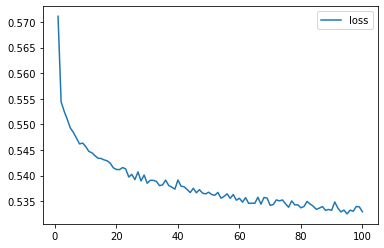

In [23]:
pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1)).plot(y="loss")
plt.savefig('nn_loss.png')

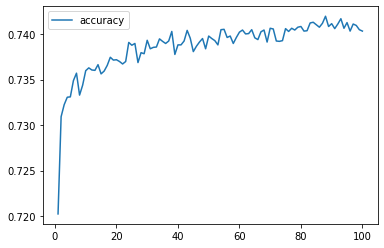

In [24]:
# Plot the accuracy
pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["accuracy"])+1)).plot(y="accuracy")
plt.savefig('nn_accuracy.png')